4. With a suitable example demonstrate the perceptron learning law with its decision regions using python. Give the output in graphical form.

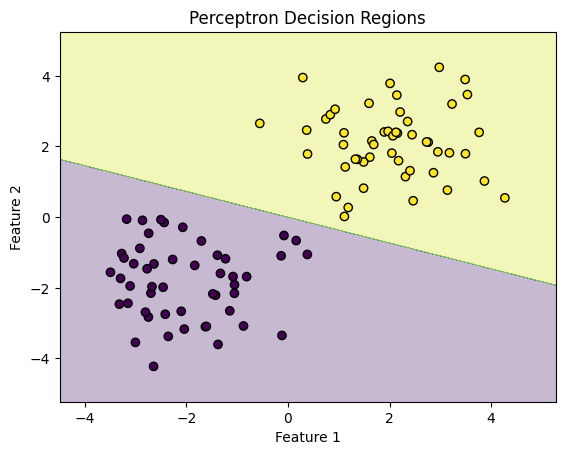

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.errors = []

        for _ in range(self.n_iterations):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights += update * xi
                self.bias += update
                error += int(update != 0.0)
            self.errors.append(error)
            if error == 0:
                break

    def predict(self, X):
        return np.where((np.dot(X, self.weights) + self.bias) >= 0.0, 1, -1)

# Generate random data points for two classes
np.random.seed(0)
class1 = np.random.randn(50, 2) + [2, 2]
class2 = np.random.randn(50, 2) + [-2, -2]
X = np.vstack([class1, class2])
y = np.array([1] * 50 + [-1] * 50)

# Train the Perceptron
perceptron = Perceptron()
perceptron.fit(X, y)

# Plot decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Regions')
plt.show()
